In [1]:
import gzip, csv, json
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import random
from random import sample

In [2]:
seed = random.seed(42)


In [3]:
highF = pd.read_csv('./high.csv', sep=',')
highF['label'] = 1

In [4]:
lowF1 = pd.read_csv('./low.csv', sep=',')
lowF1['label']=0
newF = pd.DataFrame()
newF = newF.append(lowF1.sample(n=len(highF), random_state=seed))
newF = newF.append(highF.sample(n=len(highF), random_state=seed))
#lowF = lowF1.sample(frac=len(highF)/len(lowF1))

In [5]:
print newF.head()
print newF.tail()

                 author  num_archived_comm  num_subs  min_score  max_score  \
2443         don_hector                  0        68        -60        707   
4225      w33disc00lman                  0        30        -38        738   
3856           jivatman               2492       162       -110       3056   
4349  sausagesarenice21                  0        18          0         35   
3132           Fronesis               2039       150        -44       1616   

      avg_score  std_score  num_contra_comm  num_gilded_comm  \
2443  14.511785  45.575001               25                0   
4225   6.241961  26.952420               95                0   
3856   9.587079  52.236534              511                1   
4349   3.295455   5.605560                2                0   
3132   6.157551  42.987015               66                0   

      num_distinguished_comm  ...    std_replies  num_gilded_posts  \
2443                       0  ...      11.546609                 0   
4225  

In [6]:

print newF.shape

(9912, 33)


In [7]:
newF = newF.dropna(0)
print newF.shape

print newF.head()
print newF.tail()

(9357, 33)
                 author  num_archived_comm  num_subs  min_score  max_score  \
2443         don_hector                  0        68        -60        707   
4225      w33disc00lman                  0        30        -38        738   
3856           jivatman               2492       162       -110       3056   
4349  sausagesarenice21                  0        18          0         35   
3132           Fronesis               2039       150        -44       1616   

      avg_score  std_score  num_contra_comm  num_gilded_comm  \
2443  14.511785  45.575001               25                0   
4225   6.241961  26.952420               95                0   
3856   9.587079  52.236534              511                1   
4349   3.295455   5.605560                2                0   
3132   6.157551  42.987015               66                0   

      num_distinguished_comm  ...    std_replies  num_gilded_posts  \
2443                       0  ...      11.546609                 

In [8]:
# read subreddit cooccurrence and recipricity scores

high_sub_cooc = pd.read_csv('./high_subcooc.csv', header=None, names=['author', 'subcooc'])
low_sub_cooc1 = pd.read_csv('./low_subcooc.csv', header=None, names=['author', 'subcooc'])

hsc_a = high_sub_cooc['author'].tolist()
lsc_a = low_sub_cooc1['author'].tolist()

true_low = list(set(lsc_a).difference(set(hsc_a)))
low_sub_cooc = low_sub_cooc1.loc[low_sub_cooc1['author'].isin(true_low)]

In [9]:
cooc1 = [high_sub_cooc, low_sub_cooc]
cooc = high_sub_cooc.append(low_sub_cooc)
cooc

,author,subcooc
0,Juicy_Brucesky,0.140996
1,jerkedit,0.199324
2,frothface,0.116057
3,tututang,0.067239
4,DeplorableinTX,0.663556
5,armchairCueB,1.513413
6,HD3D,0.369215
7,str8upcoffee,0.051638
8,RealisticFox,0.033009
9,YouShallKnow,0.493390


In [10]:
withWeak = pd.merge(newF, cooc, how='left', on=['author'])
print withWeak.shape

(9357, 34)


In [11]:
high_recip = pd.read_csv('./high_reciprocity.csv', header=None, names=['author', 'reciprocity'])
low_recip1 = pd.read_csv('./low_reciprocity.csv', header=None, names=['author', 'reciprocity'])

hrc_a = high_recip['author'].tolist()
lrc_a = low_recip1['author'].tolist()

true_lowr = list(set(lrc_a).difference(set(hrc_a)))
low_recip = low_recip1.loc[low_recip1['author'].isin(true_lowr)]

recp1 = [high_recip, low_recip]
recp = pd.concat(recp1)
print recp.shape
withStrong = pd.merge(newF, recp, how='left', on=['author'])
withBonds = pd.merge(withWeak, recp, how='left', on=['author'])

(13789, 2)


In [12]:
withBonds = withBonds.dropna(0)
print withBonds.shape

(6419, 35)


In [13]:
print withBonds.head()
print withBonds.tail()

           author  num_archived_comm  num_subs  min_score  max_score  \
1   w33disc00lman                  0        30        -38        738   
4        Fronesis               2039       150        -44       1616   
11         mahker                  0        40        -34        617   
12       clbgrdnr                 83       116        -75       1960   
13   BeefNostrils                  0        14         -2        425   

    avg_score  std_score  num_contra_comm  num_gilded_comm  \
1    6.241961  26.952420               95                0   
4    6.157551  42.987015               66                0   
11   7.411840  30.982790               48                0   
12  12.320599  76.918641               61                0   
13   6.690355  30.844749               10                0   

    num_distinguished_comm     ...       num_distinguished_posts  num_posts  \
1                        0     ...                             0          4   
4                        0     ...  

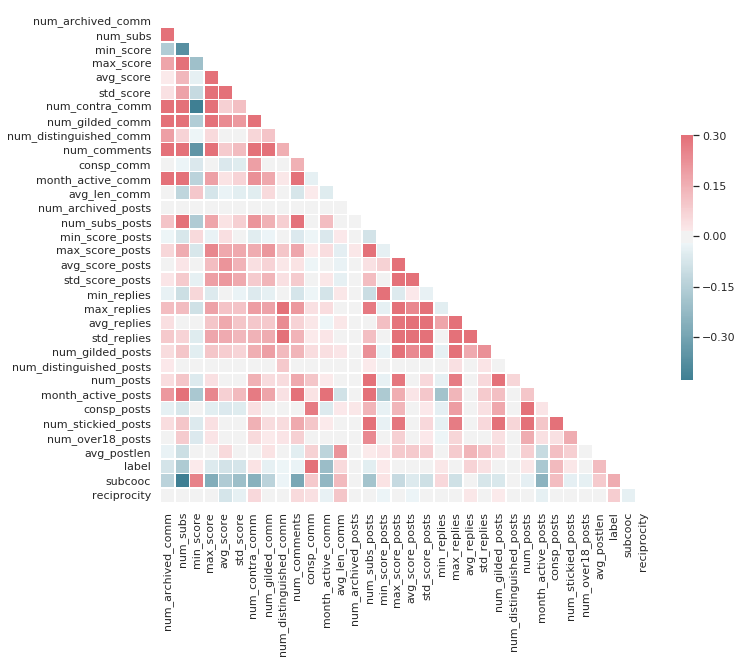

In [14]:
corr = withBonds.corr()


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(ascii_letters[26:]))

# Compute the correlation matrix
#corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
print list(withBonds)

['author', 'num_archived_comm', 'num_subs', 'min_score', 'max_score', 'avg_score', 'std_score', 'num_contra_comm', 'num_gilded_comm', 'num_distinguished_comm', 'num_comments', 'consp_comm', 'month_active_comm', 'avg_len_comm', 'num_archived_posts', 'num_subs_posts', 'min_score_posts', 'max_score_posts', 'avg_score_posts', 'std_score_posts', 'min_replies', 'max_replies', 'avg_replies', 'std_replies', 'num_gilded_posts', 'num_distinguished_posts', 'num_posts', 'month_active_posts', 'consp_posts', 'num_stickied_posts', 'num_over18_posts', 'avg_postlen', 'label', 'subcooc', 'reciprocity']


In [16]:

fields = ['avg_score', 
          'num_contra_comm', 'num_gilded_comm', 'num_distinguished_comm', 'consp_comm', 
          'avg_len_comm',  
          'avg_score_posts', 'avg_replies', 
          'num_gilded_posts', 'num_distinguished_posts',
          'consp_posts', 
          'avg_postlen', 'subcooc', 'reciprocity']

fields_wbonds = ['avg_score', 
          'num_contra_comm', 'num_gilded_comm', 'num_distinguished_comm', 'consp_comm', 
          'avg_len_comm',  
          'avg_score_posts', 'avg_replies', 
          'num_gilded_posts', 'num_distinguished_posts',
          'consp_posts', 
          'avg_postlen']

norm_fields = ['avg_score', 
          'num_contra_comm', 'num_gilded_comm', 'num_distinguished_comm', 'consp_comm', 
          'avg_len_comm',  
          'avg_score_posts', 'avg_replies', 
          'num_gilded_posts', 'num_distinguished_posts',
          'consp_posts', 
          'avg_postlen', 'subcooc', 'reciprocity']



coms_dmonth = ['num_archived_comm',
 'num_subs',
 'num_contra_comm',
 'num_gilded_comm',
 'num_distinguished_comm',
 'num_comments']

posts_dmonth=[
 'num_archived_posts',
 'num_subs_posts',
 'num_gilded_posts',
 'num_distinguished_posts',
 'num_posts',
 'num_stickied_posts',
 'num_over18_posts',
         ]


#for field in coms_dmonth:
#    withBonds[field] = withBonds[field].div(withBonds.month_active_comm, axis=0)
    
#for field in posts_dmonth:
#    withBonds[field] = withBonds[field].div(withBonds.month_active_posts, axis=0)
    

#newF = newF.dropna()
    
from sklearn import preprocessing
#newF = newF.dropna()
vnewF = pd.DataFrame()
for field in norm_fields:
    x = withBonds[[field]].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.StandardScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)
    print type(x_scaled)
    # Run the normalizer on the dataframe
    #newF[field] = pd.DataFrame(x_scaled.T)
    withBonds[field] = x_scaled


<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [17]:
withBonds.head()

,author,num_archived_comm,num_subs,min_score,max_score,avg_score,std_score,num_contra_comm,num_gilded_comm,num_distinguished_comm,...,num_distinguished_posts,num_posts,month_active_posts,consp_posts,num_stickied_posts,num_over18_posts,avg_postlen,label,subcooc,reciprocity
1,w33disc00lman,0,30,-38,738,-0.049023,26.952420,-0.059045,-0.236393,-0.033255,...,-0.020459,4,9.413381,-0.200549,4,0,2.317022,0,-0.564384,0.128081
4,Fronesis,2039,150,-44,1616,-0.062526,42.987015,-0.208597,-0.236393,-0.033255,...,-0.020459,23,21.813948,-0.216017,23,0,-0.808124,0,-0.854265,0.128081
11,mahker,0,40,-34,617,0.138119,30.982790,-0.301423,-0.236393,-0.033255,...,-0.020459,7,1.361971,-0.185080,7,0,2.481990,0,-0.806967,1.595334
12,clbgrdnr,83,116,-75,1960,0.923358,76.918641,-0.234382,-0.236393,-0.033255,...,-0.020459,13,22.514710,-0.216017,13,1,0.238974,0,-0.965603,0.397576
13,BeefNostrils,0,14,-2,425,0.022705,30.844749,-0.497388,-0.236393,-0.033255,...,-0.020459,5,4.109451,-0.185080,5,0,-0.889089,0,0.327500,-0.640480


withBonds.to_csv('./features_withbonds.csv')

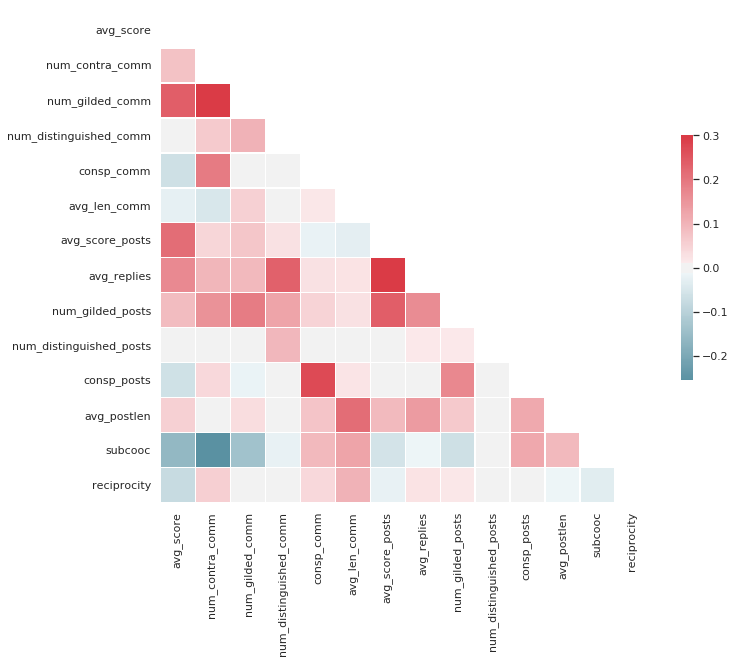

In [18]:
corr = withBonds[fields].corr()


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(ascii_letters[26:]))

# Compute the correlation matrix
#corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linreg = LinearRegression(normalize=True)
linreg.fit(withBonds[fields],withBonds['label'])
y_pred = linreg.predict(withBonds[fields])

In [21]:
score = linreg.score(withBonds[fields], withBonds['label'])
print score
rss = sum((y_pred-withBonds['label'])**2)
print rss
ret = [rss]
ret.extend([linreg.intercept_])
ret.extend(linreg.coef_)


0.13487397568
1303.66418793


In [22]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(withBonds[fields_wbonds],withBonds['label'])
clf.score(withBonds[fields_wbonds],withBonds['label']) 

0.66116217479358153

In [23]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(withBonds[fields],withBonds['label'])
clf.score(withBonds[fields],withBonds['label']) 

0.69154073843277775

In [24]:
import random

#To ensure the plots are inline i.e. under the block of code executing the plot
%matplotlib inline

#Set a seed that will be used throughout the code

alpha = 0
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(random_state=seed)

#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()

#Kernel SVM
from sklearn.svm import SVC
classifier_SVC = SVC(random_state=seed)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = "entropy", random_state=seed)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state=seed)

#Ridge Regression
from sklearn.linear_model import Ridge
alpha=0.5
classifier_ridge = Ridge(alpha=alpha,normalize=True)

#Lasso Regression
from sklearn.linear_model import Lasso
classifier_lasso = Lasso(alpha=alpha,normalize=True)

In [25]:
from sklearn.model_selection import cross_val_score
scorer = ['accuracy', 'f1', 'precision', 'recall']

for score in scorer:
    #Logistic Regression
    accuracies_logistic = cross_val_score(estimator = classifier_logistic, X = withBonds[fields], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #K-Nearest Neighbours
    accuracies_KNN = cross_val_score(estimator = classifier_KNN, X = withBonds[fields], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Naive Bayes
    accuracies_NB = cross_val_score(estimator = classifier_NB, X = withBonds[fields], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Decision Tree, scoring=
    accuracies_DT = cross_val_score(estimator = classifier_DT, X = withBonds[fields], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Random Forest
    accuracies_RF = cross_val_score(estimator = classifier_RF, X = withBonds[fields], y = withBonds['label'], cv = 10, scoring='%s' % score)
    #Ridge Regression
    #accuracies_ridge = cross_val_score(estimator = classifier_ridge, X = withBonds[fields], y = withBonds['label'], cv = 5)
    #Lasso Regression
    #accuracies_lasso = cross_val_score(estimator = classifier_lasso, X = withBonds[fields], y = withBonds['label'], cv = 5)
    print("The  for Logistic Regression is: ",score, accuracies_logistic.mean() )

    print("The  for K-Nearest Neighbours is: ",score, accuracies_KNN.mean() )

    print("The  for Naive Bayes is: ", score, accuracies_NB.mean() )

    print("The  for Decision Tree is: ", score, accuracies_DT.mean() )

    print("The  for Random Forest is: ", score, accuracies_RF.mean() )

    print "---------------------------------------------------------------------"

('The  for Logistic Regression is: ', 'accuracy', 0.83518201200372422)
('The  for K-Nearest Neighbours is: ', 'accuracy', 0.69622413421849938)
('The  for Naive Bayes is: ', 'accuracy', 0.72052709633003875)
('The  for Decision Tree is: ', 'accuracy', 0.79030979798684386)
('The  for Random Forest is: ', 'accuracy', 0.83813655922641317)
---------------------------------------------------------------------
('The  for Logistic Regression is: ', 'f1', 0.86436511861879006)
('The  for K-Nearest Neighbours is: ', 'f1', 0.75714124555798856)
('The  for Naive Bayes is: ', 'f1', 0.72447787566998489)
('The  for Decision Tree is: ', 'f1', 0.82724982601588937)
('The  for Random Forest is: ', 'f1', 0.87299534468725959)
---------------------------------------------------------------------
('The  for Logistic Regression is: ', 'precision', 0.88670953514856232)
('The  for K-Nearest Neighbours is: ', 'precision', 0.75517805813284977)
('The  for Naive Bayes is: ', 'precision', 0.93856290260956499)
('The  fo

In [26]:
print("The accuracy for Logistic Regression is:",accuracies_logistic.mean())

print("The accuracy for K-Nearest Neighbours is:",accuracies_KNN.mean())

print("The accuracy for Naive Bayes is:",accuracies_NB.mean())

print("The accuracy for Decision Tree is:",accuracies_DT.mean())

print("The accuracy for Random Forest is:",accuracies_RF.mean())

#print("The accuracy for Ridge Regression is:",accuracies_ridge.mean())

#print("The accuracy for Lasso Regression is:",accuracies_lasso.mean())

('The accuracy for Logistic Regression is:', 0.84358489388264668)
('The accuracy for K-Nearest Neighbours is:', 0.75937671660424466)
('The accuracy for Naive Bayes is:', 0.59046504369538078)
('The accuracy for Decision Tree is:', 0.82758676654182273)
('The accuracy for Random Forest is:', 0.88607668329177058)


In [27]:
from sklearn.model_selection import cross_val_score

for score in scorer:
    #Logistic Regression
    accuracies_logistic = cross_val_score(estimator = classifier_logistic, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #K-Nearest Neighbours
    accuracies_KNN = cross_val_score(estimator = classifier_KNN, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Naive Bayes
    accuracies_NB = cross_val_score(estimator = classifier_NB, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Decision Tree, scoring=
    accuracies_DT = cross_val_score(estimator = classifier_DT, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Random Forest
    accuracies_RF = cross_val_score(estimator = classifier_RF, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 10, scoring='%s' % score)
    #Ridge Regression
    #accuracies_ridge = cross_val_score(estimator = classifier_ridge, X = withBonds[fields], y = withBonds['label'], cv = 5)
    #Lasso Regression
    #accuracies_lasso = cross_val_score(estimator = classifier_lasso, X = withBonds[fields], y = withBonds['label'], cv = 5)
    print("The  for Logistic Regression is: ",score, accuracies_logistic.mean() )

    print("The  for K-Nearest Neighbours is: ",score, accuracies_KNN.mean() )

    print("The  for Naive Bayes is: ", score, accuracies_NB.mean() )

    print("The  for Decision Tree is: ", score, accuracies_DT.mean() )

    print("The  for Random Forest is: ", score, accuracies_RF.mean() )

    print "---------------------------------------------------------------------"

('The  for Logistic Regression is: ', 'accuracy', 0.82926252005422607)
('The  for K-Nearest Neighbours is: ', 'accuracy', 0.71445220497921036)
('The  for Naive Bayes is: ', 'accuracy', 0.71351374302082604)
('The  for Decision Tree is: ', 'accuracy', 0.78469843599782851)
('The  for Random Forest is: ', 'accuracy', 0.83549343281851807)
---------------------------------------------------------------------
('The  for Logistic Regression is: ', 'f1', 0.8593621304948309)
('The  for K-Nearest Neighbours is: ', 'f1', 0.769525408780111)
('The  for Naive Bayes is: ', 'f1', 0.71435629335779716)
('The  for Decision Tree is: ', 'f1', 0.8308428855891371)
('The  for Random Forest is: ', 'f1', 0.87125025349130958)
---------------------------------------------------------------------
('The  for Logistic Regression is: ', 'precision', 0.88254372381689128)
('The  for K-Nearest Neighbours is: ', 'precision', 0.77361686071525104)
('The  for Naive Bayes is: ', 'precision', 0.94273400979203414)
('The  for De

In [28]:
print("The accuracy for Logistic Regression is:",accuracies_logistic.mean())

print("The accuracy for K-Nearest Neighbours is:",accuracies_KNN.mean())

print("The accuracy for Naive Bayes is:",accuracies_NB.mean())

print("The accuracy for Decision Tree is:",accuracies_DT.mean())

print("The accuracy for Random Forest is:",accuracies_RF.mean())

#print("The accuracy for Ridge Regression is:",accuracies_ridge.mean())

#print("The accuracy for Lasso Regression is:",accuracies_lasso.mean())

('The accuracy for Logistic Regression is:', 0.83783832709113604)
('The accuracy for K-Nearest Neighbours is:', 0.76588046192259673)
('The accuracy for Naive Bayes is:', 0.57547066167290883)
('The accuracy for Decision Tree is:', 0.82733957553058679)
('The accuracy for Random Forest is:', 0.89007231920199492)


In [29]:
#Independent variables
X = withBonds[fields]
print X.head()
#Dependent variables
y = withBonds['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=True)

    avg_score  num_contra_comm  num_gilded_comm  num_distinguished_comm  \
1   -0.049023        -0.059045        -0.236393               -0.033255   
4   -0.062526        -0.208597        -0.236393               -0.033255   
11   0.138119        -0.301423        -0.236393               -0.033255   
12   0.923358        -0.234382        -0.236393               -0.033255   
13   0.022705        -0.497388        -0.236393               -0.033255   

    consp_comm  avg_len_comm  avg_score_posts  avg_replies  num_gilded_posts  \
1    -0.119306     -0.424095        -0.263577    -0.247959         -0.186954   
4    -0.464921     -0.355646        -0.256788    -0.392148         -0.186954   
11   -0.478746     -0.983795        -0.237528    -0.544616         -0.186954   
12   -0.435544      0.780585        -0.084830     0.264635         -0.186954   
13   -0.368149      0.062189        -0.258902    -0.221097         -0.186954   

    num_distinguished_posts  consp_posts  avg_postlen   subcooc  rec

In [30]:
classifier_RF1 = LogisticRegression(random_state=seed)

classifier_RF1.fit(X_train, y_train)
rf_predict = classifier_RF1.predict(X_test)
#fi = classifier_RF1.feature_importances_
#classifier_RF.score(withBonds[fields], withBonds['label'])
#for i in range(len(fi)):
#    print fields[i], fi[i]

In [31]:
X_train = X_train.loc[:, ~X_train.columns.isin(['reciprocity', 'subcooc'])]

X_test = X_test.loc[:, ~X_test.columns.isin(['reciprocity', 'subcooc'])]
print X_train.head()

      avg_score  num_contra_comm  num_gilded_comm  num_distinguished_comm  \
6980  -0.491301         0.379297        -0.236393               -0.033255   
6773   4.728886         1.745895         1.729162               -0.033255   
5146   0.201087        -0.425190        -0.236393               -0.033255   
4777   0.180332        -0.394248        -0.236393               -0.033255   
5574  -0.723655         1.766522        -0.236393               -0.033255   

      consp_comm  avg_len_comm  avg_score_posts  avg_replies  \
6980   -0.224719     -0.282450        -0.155156    -0.368128   
6773   -0.001796      0.001850        -0.189077    -0.266363   
5146    0.183108     -0.213980        -0.015471    -0.167171   
4777   -0.280017     -0.568009        -0.242070    -0.346106   
5574    0.383565      0.200041        -0.200409    -0.246679   

      num_gilded_posts  num_distinguished_posts  consp_posts  avg_postlen  
6980         -0.186954                -0.020459    -0.138673     0.398447  


In [32]:
classifier_RF2 = LogisticRegression(random_state=seed)

classifier_RF2.fit(X_train, y_train)
rf_predict_wbonds = classifier_RF2.predict(X_test)
#fi = classifier_RF2.feature_importances_
#classifier_RF.score(withBonds[fields], withBonds['label'])
#for i in range(len(fi)):
#    print fields_wbonds[i], fi[i]

In [33]:
#from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load boston housing dataset as an example

#boston = load_boston()
X = withBonds[fields]
Y = withBonds['label']
names = fields
rf = RandomForestRegressor()
rf.fit(X, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)


Features sorted by their score:
[(0.5595, 'consp_comm'), (0.0537, 'avg_score'), (0.0527, 'avg_replies'), (0.0511, 'avg_postlen'), (0.0494, 'avg_len_comm'), (0.0487, 'num_contra_comm'), (0.0475, 'subcooc'), (0.0468, 'avg_score_posts'), (0.0373, 'consp_posts'), (0.0363, 'reciprocity'), (0.0088, 'num_gilded_comm'), (0.0034, 'num_gilded_posts'), (0.0034, 'num_distinguished_comm'), (0.0015, 'num_distinguished_posts')]


In [34]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(withBonds[fields])
est = sm.Probit(withBonds['label'], X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.351443
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                  label   No. Observations:                 6419
Model:                         Probit   Df Residuals:                     6404
Method:                           MLE   Df Model:                           14
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.4694
Time:                        21:45:04   Log-Likelihood:                -2255.9
converged:                       True   LL-Null:                       -4251.6
                                        LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.5500      0.071     35.869      0.000       2.411   

In [35]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(withBonds[fields])
est = sm.Logit(withBonds['label'], X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.348491
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 6419
Model:                          Logit   Df Residuals:                     6404
Method:                           MLE   Df Model:                           14
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.4739
Time:                        21:45:04   Log-Likelihood:                -2237.0
converged:                       True   LL-Null:                       -4251.6
                                        LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       4.6617      0.145     32.249      0.000       4.378  

In [36]:
print len(fields), len(ret)

print "Linear Regression Feature Coefficients"
for i in range(len(ret)-2):
    print fields[i], ret[i+2]
    
    

14 16
Linear Regression Feature Coefficients
avg_score -0.0235272360428
num_contra_comm 0.00633688349434
num_gilded_comm -0.00804495882476
num_distinguished_comm -0.0156217891626
consp_comm 0.130718618184
avg_len_comm 0.00212618297949
avg_score_posts -0.0118715999466
avg_replies 0.0399603385739
num_gilded_posts -0.005650204361
num_distinguished_posts 0.00325297438948
consp_posts 0.0144267598132
avg_postlen 0.0419029751335
subcooc 0.0575309084486
reciprocity 0.0359511026903


from sklearn.linear_model import Ridge
alpha=0.5
ridgereg = Ridge(alpha=alpha,normalize=True)
ridgereg.fit(withBonds[fields],withBonds['label'])
y_pred = ridgereg.predict(withBonds[fields])

rss = sum((y_pred-newF['label'])**2)
ret = [rss]
ret.extend([ridgereg.intercept_])
ret.extend(ridgereg.coef_)

print len(fields), len(ret)
print "Ridge Regression Feature Coeeficients"
for i in range(len(ret)-2):
    print fields[i], ret[i+2]

plt.figure(figsize=(60,10))   
plt.bar(fields,ret[2:])
plt.show()

from sklearn.linear_model import Lasso
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error

avs = [0, 1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
#avs = [1]
for alpha in avs:
#alpha=1
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(newF[fields],newF['label'])
    y_pred = lassoreg.predict(newF[fields])

    rss = sum((y_pred-newF['label'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    print alpha, mean_squared_error(newF['label'], y_pred)
    #print alpha, rss
    #print len(fields), len(ret)
    #print "Lasso Regression Feature Coefficients"
    #for i in range(len(ret)-2):
    #    print fields[i], ret[i+2]

    #plt.figure(figsize=(60,10))   
    #plt.bar(fields,ret[2:])
    #plt.show()

In [37]:
from mlxtend.evaluate import mcnemar_table
tb = mcnemar_table(y_test, rf_predict, rf_predict_wbonds)
print tb

print rf_predict[300:400]
print rf_predict_wbonds[300:400]

[[1337    9]
 [  27  232]]
[1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1]
[1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1]


In [38]:
from mlxtend.evaluate import mcnemar
chi2, p = mcnemar(tb, corrected=True)
print chi2
print p

8.02777777778
0.00460653226339
